Predicted Class: 1


C:\Users\DHUSNIC INFANT DM\AppData\Local\Temp\ipykernel_22108\1640320487.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx, yy, Z, alpha=0.4, label='Decision Boundary')


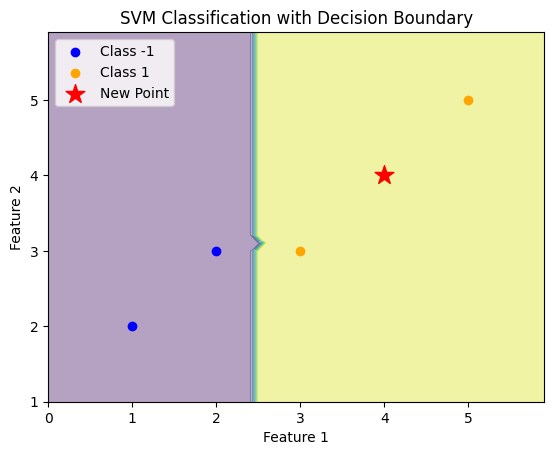

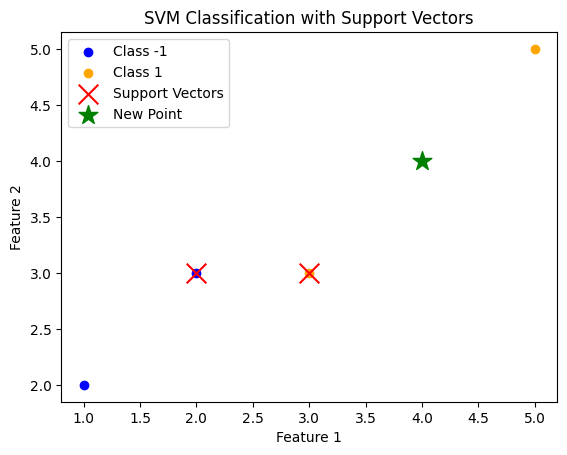

In [6]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Example 1: SVM Classification
X_class = np.array([[1, 2], [2, 3], [3, 3], [5, 5]])  # Features
y_class = np.array([-1, -1, 1, 1])  # Classes
new_point = np.array([[4, 4]])

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_class, y_class)
prediction_class = svm_clf.predict(new_point)
print("Predicted Class:", prediction_class[0])

# Create mesh grid for visualization
x_min, x_max = X_class[:, 0].min() - 1, X_class[:, 0].max() + 1
y_min, y_max = X_class[:, 1].min() - 1, X_class[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions on mesh grid
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and points
plt.contourf(xx, yy, Z, alpha=0.4, label='Decision Boundary')
plt.scatter(X_class[y_class==-1, 0], X_class[y_class==-1, 1], c='blue', label='Class -1')
plt.scatter(X_class[y_class==1, 0], X_class[y_class==1, 1], c='orange', label='Class 1')
plt.scatter(new_point[:, 0], new_point[:, 1], c='red', marker='*', s=200, label='New Point')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()

# Plot support vectors
plt.scatter(X_class[y_class==-1, 0], X_class[y_class==-1, 1], c='blue', label='Class -1')
plt.scatter(X_class[y_class==1, 0], X_class[y_class==1, 1], c='orange', label='Class 1')
plt.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], 
           color='red', marker='x', s=200, label='Support Vectors')
plt.scatter(new_point[:, 0], new_point[:, 1], c='green', marker='*', s=200, label='New Point')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with Support Vectors')
plt.legend()
plt.show()

Predicted Class (RBF Kernel): 1


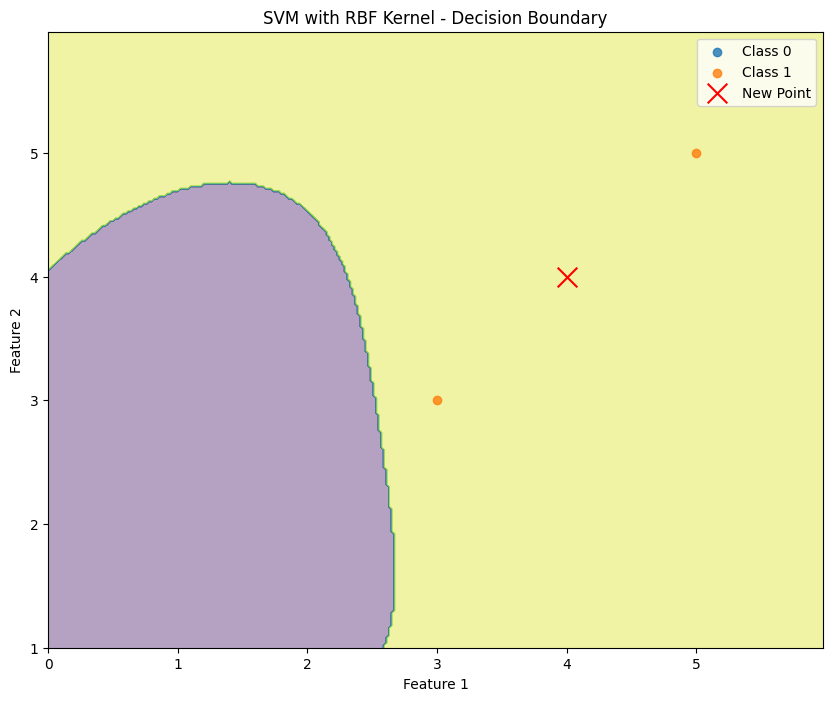

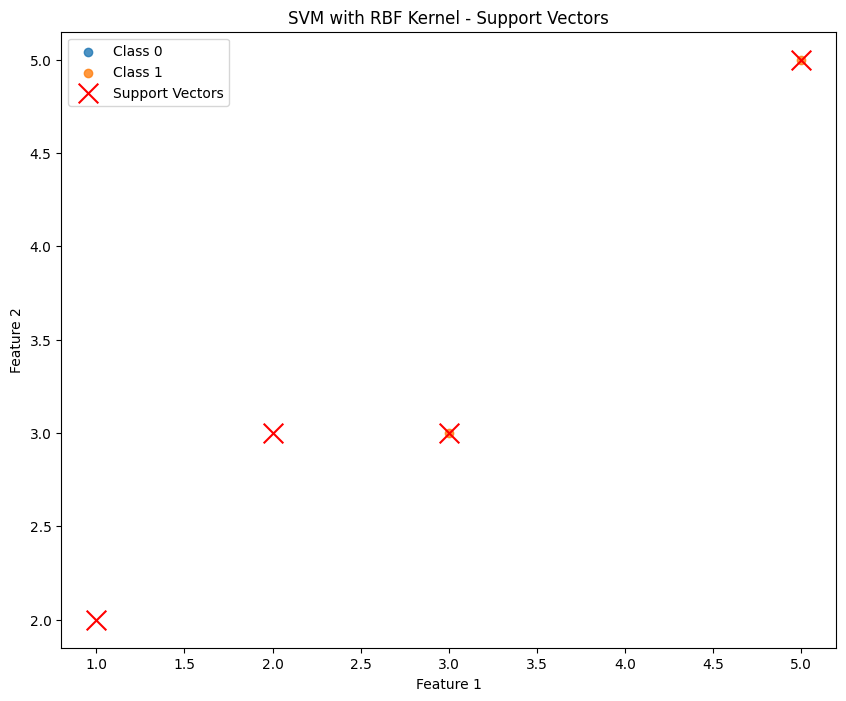

In [9]:
# Example 2: SVM with RBF Kernel
svm_clf_rbf = SVC(kernel='rbf', gamma=0.5)
svm_clf_rbf.fit(X_class, y_class)
prediction_rbf = svm_clf_rbf.predict(new_point)
print("Predicted Class (RBF Kernel):", prediction_rbf[0])

# Create a mesh grid for visualization
x_min, x_max = X_class[:, 0].min() - 1, X_class[:, 0].max() + 1
y_min, y_max = X_class[:, 1].min() - 1, X_class[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Make predictions on the mesh grid
Z = svm_clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_class[y_class==0, 0], X_class[y_class==0, 1], alpha=0.8, label='Class 0')
plt.scatter(X_class[y_class==1, 0], X_class[y_class==1, 1], alpha=0.8, label='Class 1')
plt.scatter(new_point[:, 0], new_point[:, 1], color='red', marker='x', s=200, label='New Point')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel - Decision Boundary')
plt.legend()
plt.show()

# Plot support vectors
plt.figure(figsize=(10, 8))
plt.scatter(X_class[y_class==0, 0], X_class[y_class==0, 1], alpha=0.8, label='Class 0')
plt.scatter(X_class[y_class==1, 0], X_class[y_class==1, 1], alpha=0.8, label='Class 1')
plt.scatter(svm_clf_rbf.support_vectors_[:, 0], svm_clf_rbf.support_vectors_[:, 1], 
           color='red', marker='x', s=200, label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel - Support Vectors')
plt.legend()
plt.show()

Predicted Class: Buy


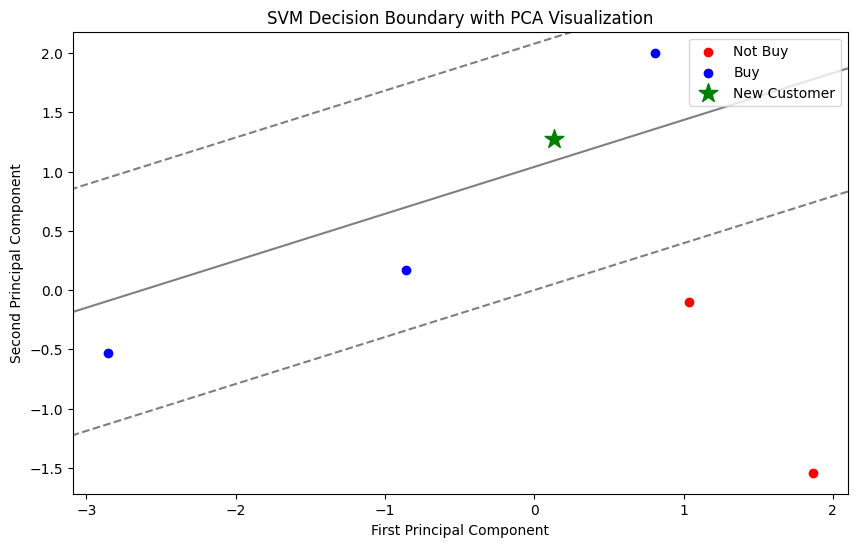

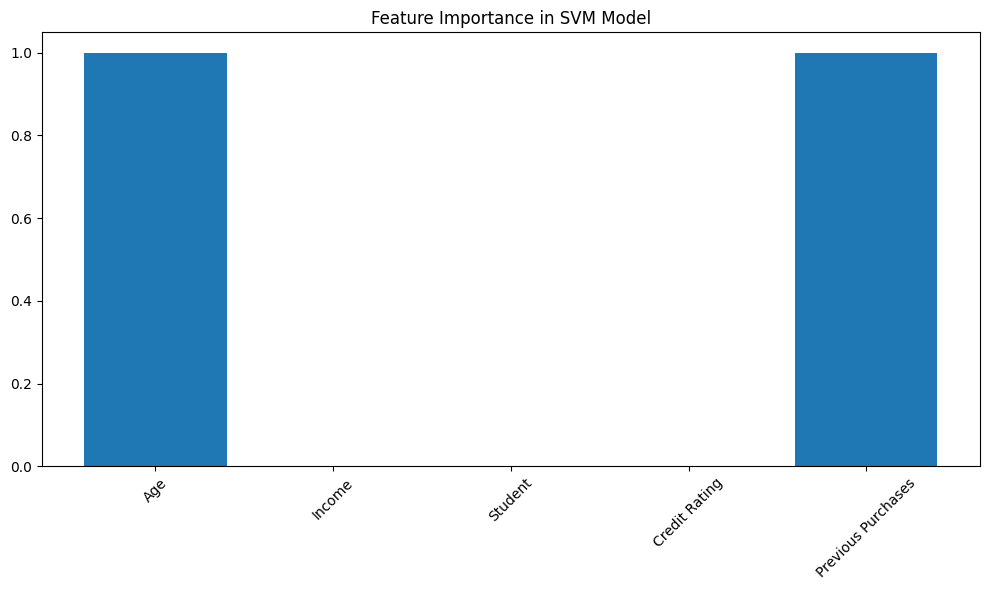

In [8]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = np.array([
    [0, 2, 0, 0, 0],
    [0, 2, 0, 1, 0],
    [1, 2, 0, 0, 1],
    [2, 1, 0, 0, 0],
    [2, 0, 1, 0, 0]
])

y = np.array([0, 0, 1, 1, 1])
new_customer = np.array([[0, 2, 1, 0, 1]])

svm_clf = SVC(kernel='linear', C=1.0)
svm_clf.fit(X, y)

prediction = svm_clf.predict(new_customer)
print("Predicted Class:", "Buy" if prediction[0] == 1 else "Not Buy")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
new_customer_scaled = scaler.transform(new_customer)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
new_customer_pca = pca.transform(new_customer_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', label='Not Buy')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', label='Buy')
plt.scatter(new_customer_pca[:, 0], new_customer_pca[:, 1], color='green', marker='*', s=200, label='New Customer')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svm_clf.decision_function(pca.inverse_transform(xy))
Z = Z.reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('SVM Decision Boundary with PCA Visualization')
plt.legend()
plt.show()

feature_importance = np.abs(svm_clf.coef_[0])
plt.figure(figsize=(10, 6))
plt.bar(['Age', 'Income', 'Student', 'Credit Rating', 'Previous Purchases'], feature_importance)
plt.title('Feature Importance in SVM Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()